In [3]:
# reading file
# upload the results of topic modeling in the form of txt-file
import numpy as np
import pandas as pd


f = 'Lenta_100topics_plsa.txt'

df = pd.read_csv(f, delimiter=';',decimal=',')
print('Size of data', df.shape)
print(list(df))
print()

Size of data (18026, 102)
['Word', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', 'Unnamed: 101']



In [4]:
del df['Word']
del df['Unnamed: 101']
print(list(df))

X = df.values
num_rows, num_feature = X.shape
print('X number of rows: ', num_rows)
print('X number of columns: ', num_feature)

print('------------------------------')

# remove zeros from X in order to avoid arithmetic problems when taking logarithm
X[X < 0.00000001] = 0.00000001

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100']
X number of rows:  18026
X number of columns:  100
------------------------------


In [5]:
import random
import math
import scipy.stats
from scipy import special
import time
start = time.time()

Renyi = []
clusters = []
Density = []
Energy = []
sum_prob = 0
word_ratio = 0
free_energy = 0
Renyi_entropy = 0
threshold = 1/num_rows

glob_sum_prob = 0
glob_word_rat = 0
glob_topics =  []
glob_Renyi = 0
glob_free_energy = 0
Renyi_full = []
clusters_glob = []
my_min = 1000000000
my_cluster = 0

xs = []
xc = 0

num_rows, num_feature = X.shape
topics_num = num_feature
print('The original number of topics: ', topics_num)

renorm_iter = topics_num -1

for r in range(renorm_iter): #decreasing the number of topics (columns) in the loop  
    num_rows, num_feature = X.shape
    topics_num = num_feature
    print('Current number of topics: ', topics_num)
    print()
    
    Renyi = []
    xs = []
    glob_sum_prob = 0
    glob_word_rat = 0
    glob_Renyi = 0
    glob_free_energy = 0
    
    for j in range(topics_num): 
        sum_prob = 0
        word_ratio = 0
        free_energy = 0
        Renyi_entropy = 0
        word_ratio_n = 0
        
        for k in range(num_rows): 
            if X[k][j] > threshold:
                sum_prob = sum_prob + X[k][j]
                word_ratio = word_ratio + 1
                #calclulation of global quantities
                glob_sum_prob = glob_sum_prob + X[k][j]
                glob_word_rat = glob_word_rat + 1
        # -------------calculation of local Renyi entropy for each topic---------------------------------------    
        #normalization
        sum_prob1 = sum_prob/topics_num
        word_ratio_n = word_ratio/(topics_num*num_rows)   
        
        if sum_prob1 < 0.00000000001: sum_prob1 = 0.00000000001
        if word_ratio_n < 0.00000000001: word_ratio_n = 0.00000000001
        
        free_energy = math.log(sum_prob1) - topics_num*math.log(word_ratio_n)
        Renyi_entropy = -free_energy/(topics_num-1)
        Renyi.append(Renyi_entropy)
        clusters.append((j))
        
        
    # -------------calculation of the global Renyi entropy (for the whole matrix Phi)------------------------
    glob_word_rat = glob_word_rat/(topics_num*num_rows) 
    glob_sum_prob = glob_sum_prob/topics_num
    
    E = -math.log(glob_sum_prob)
    S = math.log(glob_word_rat)  
    glob_free_energy = E - topics_num*S
    
    glob_Renyi = glob_free_energy/(topics_num-1)

    Renyi_full.append(glob_Renyi)
    Density.append(S)
    Energy.append(E)
    clusters_glob.append(topics_num)
    
    if my_min>glob_Renyi :
        my_min = glob_Renyi
        my_cluster = topics_num
        
    print('Renyi min: ', my_min, 'num cluster: ', my_cluster)
    
  
   # ----------------selecting a pair of columns with minimal local Renyi entropy-------------
    xc = zip(Renyi,clusters)
    
    #sorting
    xs = sorted(xc, key=lambda tup: tup[0])
    #extract the indexes of columns with minimal local Renyi entropy
    k1 = xs[0][1]
    k2 = xs[1][1]
    # ---------------the end of the procedure of choosing topics with minimal local Renyi entropy------------
    
    
    
     #------------------------- generation of two random topic indexes----------------------------------------
    #k1 = random.randint(0,topics_num -2)
    #k2 = random.randint(0,topics_num -1)
    #------------------------- the end of the generation  of two random topic indexes ---------------------------------------
    
    
    
    # -------------------------------------selecting the topics with minimum symmetric KL divergence --------------
    
    # ------------------------------------ calculation of symmetric KL divergence ---------------------------------    

    
    #KLB =np.ones((topics_num, topics_num), dtype=float)

    #first, fulfill KLB with some big numbers, then calculate values in upper triangle 
    #KLB=KLB*333
    #min_klb = 333
                
    #for i in range (topics_num):
   #     l = [m for m in range(i+1,topics_num)]
        #print('------------------------')
   #     for j in l:
   #         KLB[i][j] = 0
   #         p = X[:,i]
   #         q = X[:,j]
   #         KLB[i][j] = ((scipy.stats.entropy(p, q) + scipy.stats.entropy(q, p)) / 2)
    #        if min_klb> KLB[i][j]:
    #            min_klb = KLB[i][j]
    #            i_min = i
     #           j_min = j
            #print (KLB[i][j])
   
    #print(KLB) 
    # extract indexes of the topics with minimum KL divergence
   # i_min,j_min = np.unravel_index(KLB.argmin(), KLB.shape)
    
    #print (KLB.argmin())
   # print ('Min of KLB', KLB[i_min][j_min])
    
   # k1 = i_min
   # k2 = j_min;
   # print ('min KLB', min_klb, k1, k2)
 # ------------------------------------the end of the procedure of selecting topics with minimum KL divergence ------------------------------------------- 
    

    
    # ------------------------------- renormalization procedure on the basis of the found indexes of topics k1, k2 ---------------------------
    #summation of two columns 
    topics_sum = 0
    for l in range(num_rows): 
        X[l][k1] = (X[l][k1] + X[l][k2])
        topics_sum = topics_sum + X[l][k1]

    for l in range(num_rows): # normalizing
        X[l][k1] = X[l][k1]/topics_sum
    
    #remove column k2
    X = np.delete(X, k2, 1)
        

print('расчет закончен')

print('min Renyi entropy: ', my_min)
print('num. cluster: ', my_cluster)

stop = time.time() 
print('time of execution (sec)', stop - start)

The original number of topics:  100
Current number of topics:  100

Renyi min:  2.9837610783363124 num cluster:  100
Current number of topics:  99

Renyi min:  2.97436447144623 num cluster:  99
Current number of topics:  98

Renyi min:  2.965278250699814 num cluster:  98
Current number of topics:  97

Renyi min:  2.9569331648071664 num cluster:  97
Current number of topics:  96

Renyi min:  2.9480451900543554 num cluster:  96
Current number of topics:  95

Renyi min:  2.938751255921552 num cluster:  95
Current number of topics:  94

Renyi min:  2.9294376105805933 num cluster:  94
Current number of topics:  93

Renyi min:  2.9207746420970695 num cluster:  93
Current number of topics:  92

Renyi min:  2.9113189902993915 num cluster:  92
Current number of topics:  91

Renyi min:  2.9029145634251767 num cluster:  91
Current number of topics:  90

Renyi min:  2.894672032996837 num cluster:  90
Current number of topics:  89

Renyi min:  2.8851682793930604 num cluster:  89
Current number of t

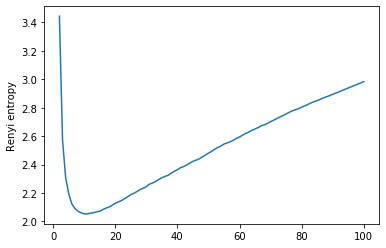

In [7]:

import matplotlib.pyplot as plot
plot.plot(clusters_glob, Renyi_full)
plot.ylabel('Renyi entropy')
plot.show()

In [39]:
#saving the results of calculation 
import csv
from itertools import zip_longest
d = [clusters_glob, Renyi_full]
export_data = zip_longest(*d, fillvalue = '')
with open('Lenta_plsa_Renyi_min.csv', 'w', encoding="ISO-8859-1", newline='') as myfile:
      wr = csv.writer(myfile)
      wr.writerow(("Number of clusters","Renyi entropy"))
      wr.writerows(export_data)
myfile.close()